![udacity-banner](https://miro.medium.com/max/1400/1*XV1XQlk4lCYcm-ft5-gMtw.jpeg)
## Udacity Connect Session - Week 11 -  Visualization Case Study & A Peek at Project 3
### Agenda



* [Project 3 checkups](#)
* [Visualization Case Study](#)
    - Pandas Profiling
    - Univaraite Exploration
    - Bivariate Exploration
    - Multivariate Exploration
    - Explanatory Visualizations
* [A Peek at Project 3](#)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Visualization Case Study

In [9]:

# price distribution

plt.figure(figsize=[8,6])

sb.histplot(diamond_focus, x='price')

NameError: name 'diamond_focus' is not defined

<Figure size 576x432 with 0 Axes>

### Background Information on the Diamond Dataset

It is dataset regarding the prices and attributes of approximately 54,000 round-cut diamonds. 

Starting from univariate visualizations, moving through bivariate visualizations, and finally multivariate visualizations.

The dataset consists of almost 54,000 rows and 10 columns:

- price: Price in dollars. Data were collected in 2008.
- carat: Diamond weight. 1 carat is equal to 0.2 grams.
- cut: Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
- color: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
- clarity: Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
- x, y, z: Diamond length, width, and depth, respectively, in mm.
- table: Ratio of the width of the top face of diamond to its overall width, as a percentage.
- depth: Proportional depth of the diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

For the case study, we will concentrate only on the variables in the top five bullet points: price and the four 'C's of diamond grade. 

- Price (Dollars)
- Carat - Diamond weight. 1 carat is equal to 0.2 grams
- cut: Quality of diamond cut -  (low) Fair, Good, Very Good, Premium, Ideal (best)
- color: Measure of diamond coloration -  (some color) J, I, H, G, F, E, D (colorless).
- clarity: Measure of diamond inclusions - (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless)

Our focus will be on answering the question about the degree of importance that each of these quality measures has on the pricing of a diamond. 

* Pricing - dependent variable
* Others - independent variable

In [10]:

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [11]:

#import the dataset

diamond_df = pd.read_csv('diamonds.csv')
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Visually and Programmatically Inspect the Dataset

In [4]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
diamond_df.sample(50)

,carat,cut,color,clarity,depth,table,price,x,y,z
52871,0.73,Premium,G,VS2,60.3,57.0,2581,5.88,5.82,3.53
637,0.73,Premium,F,VS2,59.9,59.0,2841,5.87,5.77,3.50
548,0.80,Premium,E,SI2,60.2,57.0,2829,6.05,6.01,3.63
40545,0.45,Good,D,VS2,63.7,61.0,1149,4.81,4.73,3.04
26110,2.01,Premium,I,VS2,62.1,59.0,15379,7.98,8.06,4.98
22269,1.51,Very Good,H,VS2,63.0,57.0,10319,7.25,7.30,4.58
48750,0.56,Ideal,F,VS1,61.7,54.0,2016,5.34,5.30,3.28
11984,1.20,Very Good,J,SI1,61.2,55.0,5142,6.84,6.88,4.20
6892,1.10,Good,I,SI1,63.1,61.0,4133,6.49,6.56,4.12
31306,0.32,Ideal,D,VS2,62.7,57.0,758,4.40,4.44,2.77


### Our focus will be on answering the question about the degree of importance that each of these quality measures has on the pricing of a diamond.

For the case study, we will concentrate only on the variables in the top five bullet points: **Price and the four 'C's of diamond grade.**

- Price (Dollars)
- Carat - Diamond weight. 1 carat is equal to 0.2 grams
- Cut: Quality of diamond cut - (low) Fair, Good, Very Good, Premium, Ideal (best)
- Color: Measure of diamond coloration - (some color) J, I, H, G, F, E, D (colorless).
- Clarity: Measure of diamond inclusions - (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless)

Question - Visualize - Observe

In [5]:
# set a general color scheme

sb.set_theme(style='darkgrid', palette='muted')

In [6]:
# Take a subset of the dataset focusing on the columns to be explored

diamond_focus = diamond_df[['price', 'carat','cut','color','clarity']]
diamond_focus.head()

,price,carat,cut,color,clarity
0,326,0.23,Ideal,E,SI2
1,326,0.21,Premium,E,SI1
2,327,0.23,Good,E,VS1
3,334,0.29,Premium,I,VS2
4,335,0.31,Good,J,SI2


## Pandas Profiling

pandas-profiling generates profile reports from a pandas DataFrame. The pandas df.describe() function is handy yet a little basic for exploratory data analysis. pandas-profiling extends pandas DataFrame with df.profile_report(), which automatically generates a standardized univariate and multivariate report for data understanding.

For each column, the following information (whenever relevant for the column type) is presented in an interactive HTML report:

- Type inference: detect the types of columns in a DataFrame

- Essentials: type, unique values, indication of missing values

- Quantile statistics: minimum value, Q1, median, Q3, maximum, range, interquartile range

- Descriptive statistics: mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness

- Most frequent and extreme values

- Histograms: categorical and numerical

- Correlations: high correlation warnings, based on different correlation metrics (Spearman, Pearson, Kendall, Cramér’s V, Phik)

- Missing values: through counts, matrix, heatmap and dendrograms

- Duplicate rows: list of the most common duplicated rows

- Text analysis: most common categories (uppercase, lowercase, separator), scripts (Latin, Cyrillic) and blocks (ASCII, Cyrilic)

- File and Image analysis: file sizes, creation dates, dimensions, indication of truncated images and existance of EXIF metadata


The report contains three additional sections:

- Overview: mostly global details about the dataset (number of records, number of variables, overall missigness and duplicates, memory footprint)

- Alerts: a comprehensive and automatic list of potential data quality issues (high correlation, skewness, uniformity, zeros, missing values, constant values, between others)

- Reproduction: technical details about the analysis (time, version and configuration)

In [338]:
#install pandas profiling

!pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=4b1f9acabf5d05288bdefa9945477c99ebf93579b0e054e2dd238c53db5469bc
  Stored in directory: c:\users\dipson\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [7]:
# import pandas profiling report

from pandas_profiling import ProfileReport

In [8]:
# create pandas profile report
profile = ProfileReport(diamond_df, title="Diamonds Dataset Pandas Profiling Report")

# save the report to an output file
profile.to_file(output_file='diamond_output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# embed the report as a widget within jupyter notebook

profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Pandas Profiling disadvantage

* The main disadvantage of pandas profiling is its use with large datasets. With the increase in the size of the data the time to generate the report also increases a lot.

- One way to solve this problem is to generate the report from only a part of all the data we have. ```df.sample()```

- It is important to make sure that the data selected to generate the report is representative of all the data we have, for example it could be the case that the first X rows of data contain only data from one category. In this example we would like to randomize the order of the data and select a representative sample.

- Another alternative is to use the minimum mode that was introduced in version 2.4 of pandas profiling. You can check which version you have installed with this command:

```pandas_profiling.version.__version__```

# Univariate Exploration

### Question - Visualize - Observe

What can we check under Univariate Exploration - Distribution, Comparison of Values

* Bar Charts - compare categories of data or groups of data - best for discrete variable
* Histogram/Box Plot - check distribution of values - best for continous variable
* Pie charts - Check the composition or breakdown of the values
* Donut chart - variant of the pie chart

#### Question
**We can check for:**
- Price distribution
- Carat Distribtuion

**Features value comparison**
- colors
- clarity
- cut

In [6]:
diamond_focus.head()

,price,carat,cut,color,clarity
0,326,0.23,Ideal,E,SI2
1,326,0.21,Premium,E,SI1
2,327,0.23,Good,E,VS1
3,334,0.29,Premium,I,VS2
4,335,0.31,Good,J,SI2


#### Histograms and Deciding on bins and binsize

A histogram is meant to depict the frequency distribution of a continuous numeric variable. When our variable of interest does not fit this property, we need to use a different chart type instead: a bar chart. A variable that takes categorical values, like user type (e.g. guest, user) or location are clearly non-numeric, and so should use a bar chart.
 
[Choose Bin Sizes for Histograms in Easy Steps + Sturge’s Rule](https://www.statisticshowto.com/choose-bin-sizes-statistics/)

[A Complete Guide to Histograms](https://chartio.com/learn/charts/histogram-complete-guide/)


### Visualize

<AxesSubplot:xlabel='price', ylabel='Count'>

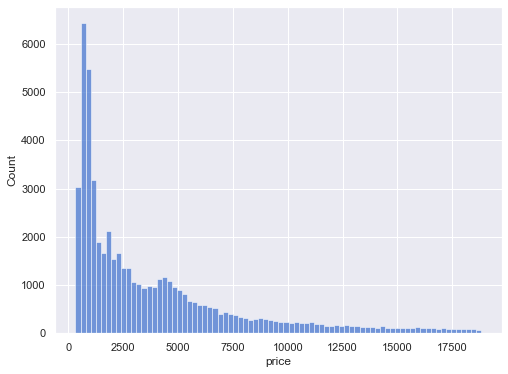

In [7]:
# price distribution

plt.figure(figsize=[8,6])

sb.histplot(diamond_focus, x='price')

<AxesSubplot:xlabel='price', ylabel='Count'>

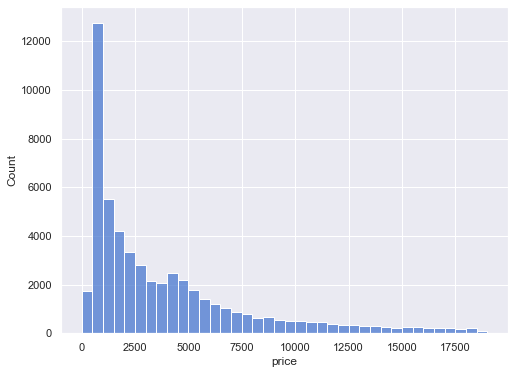

In [8]:
# price distribution with custom binsize and bins

plt.figure(figsize=[8,6])

binsize = 500
bins = np.arange(0, diamond_focus.price.max() + binsize, binsize)
sb.histplot(diamond_focus, x='price' , bins=bins)

<AxesSubplot:xlabel='price', ylabel='Count'>

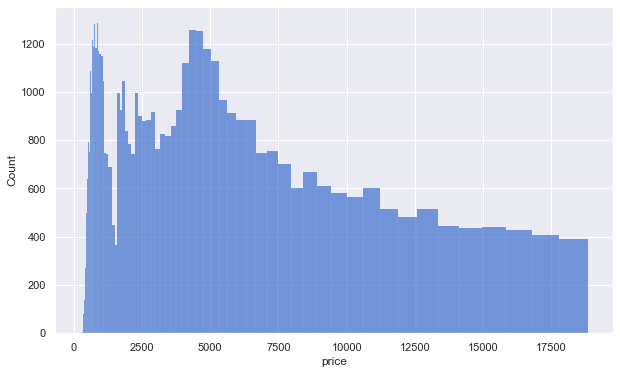

In [12]:
# price distribution - zoom in on price range 0 - 20k

plt.figure(figsize=[10,6])

log_binsize = 0.025
bins = 10**np.arange(2.4, np.log10(diamond_focus.price.max()) + log_binsize, log_binsize)

sb.histplot(diamond_focus, x='price' , bins=bins)

<AxesSubplot:xlabel='price', ylabel='Count'>

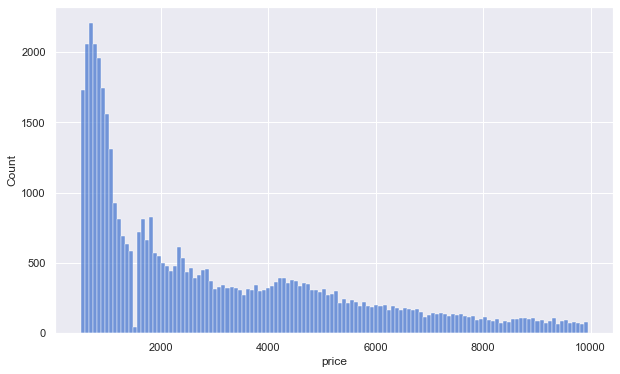

In [92]:
# price distribution - manual bins entry

plt.figure(figsize=[10,6])

binsize = 500
bins = np.arange(500, 10000, 75)

sb.histplot(diamond_focus, x='price' , bins=bins)

#### Observation
Price has a long-tailed distribution, with a lot of diamonds on the low price end, and few on the high price end. When plotted on a log-scale, the price distribution looks roughly bimodal, with one peak between 500 and 1000, and a second peak a little below 5000. Interestingly, there's a steep jump in frequency right before 2000, rather than a smooth ramp up.

<AxesSubplot:xlabel='carat', ylabel='Count'>

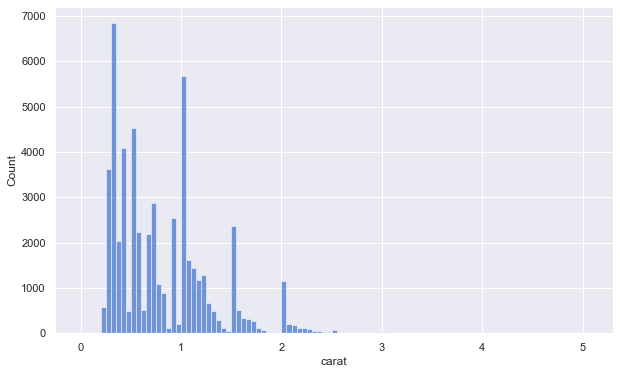

In [81]:
# Carat distribution

plt.figure(figsize=[10,6])

binsize = 0.05
bins = np.arange(0, diamond_focus.carat.max() + binsize, binsize)
sb.histplot(diamond_focus, x='carat', bins=bins)

In [8]:
diamond_focus.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

<AxesSubplot:xlabel='carat', ylabel='Count'>

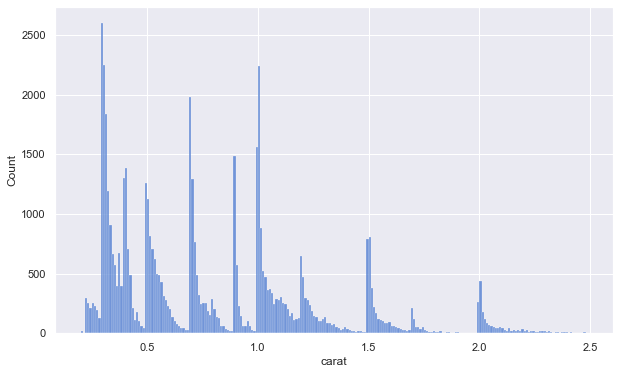

In [10]:
# Carat distribution with manual bins based on range of data

plt.figure(figsize=[10,6])

binsize = 0.01
bins = np.arange(0.2, 2.5, 0.01) #start-edge, end-edge, bin-interval/increment - zoom on carat from 0.2 to 2.5
sb.histplot(diamond_focus, x='carat', bins=bins)

### Kernal Density Estimation

Kernel density estimation is a really useful statistical tool with an intimidating name. Often shortened to KDE, it’s a technique that let’s you create a smooth curve given a set of data.

This can be useful if you want to visualize just the “shape” of some data, as a kind of continuous replacement for the discrete histogram. It can also be used to generate points that look like they came from a certain dataset - this behavior can power simple simulations, where simulated objects are modeled off of real data.

*KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable. We can also plot a single graph for multiple samples which helps in more efficient data visualization.*

Kernel Density Estimation (KDE) is a technique for depicting the conditional distribution of linear and non-linear input parameters. The kdeplot() method returns a much less complex, better semantic graphic whenever we want to display numerous dispersions. Various data sets could be seen utilizing one graphical presentation in KDE. It’s a much more effective form of visual analysis. Kernel Density Estimation (KDE) is a predictive model for computing and visualizing the posterior probability of a discrete variable. The analysis makes no assumptions regarding the dataset, including whether it reflects the requirements of a standard or any probability.

Kernel Density Estimate is a simplified histogram version that does not include the line of distribution periods and respective terminal points. Creating distinct figures for the data sets and combining those to create a complete shape provides a rectified line for the posterior distribution of an original dataset.`

[See visual](https://mathisonian.github.io/kde/)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

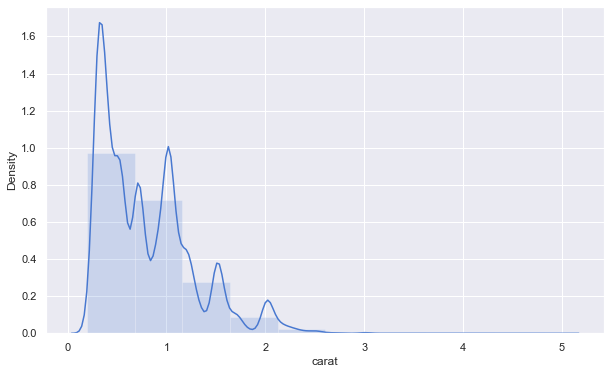

In [27]:
# plot the kde of carat - probability density of the sample against a single continuous variable
plt.figure(figsize=[10,6])

sb.distplot(diamond_focus.carat, kde=True, bins=10, hist_kws = {'alpha' : 0.2})

<AxesSubplot:xlabel='carat', ylabel='Density'>

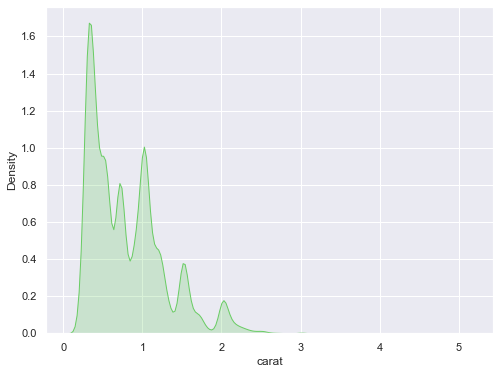

In [42]:
# plot the kde of carat - probability density of the sample against a single continuous variable - using kdeplot

plt.figure(figsize=[8,6])
sb.kdeplot(diamond_focus.carat, color='g', shade=True)

#### Barchart

**Question**

Features value comparison of the following variable:
- colors
- clarity
- cut

In [93]:
diamond_focus.head()

,price,carat,cut,color,clarity
0,326,0.23,Ideal,E,SI2
1,326,0.21,Premium,E,SI1
2,327,0.23,Good,E,VS1
3,334,0.29,Premium,I,VS2
4,335,0.31,Good,J,SI2


<AxesSubplot:xlabel='clarity', ylabel='count'>

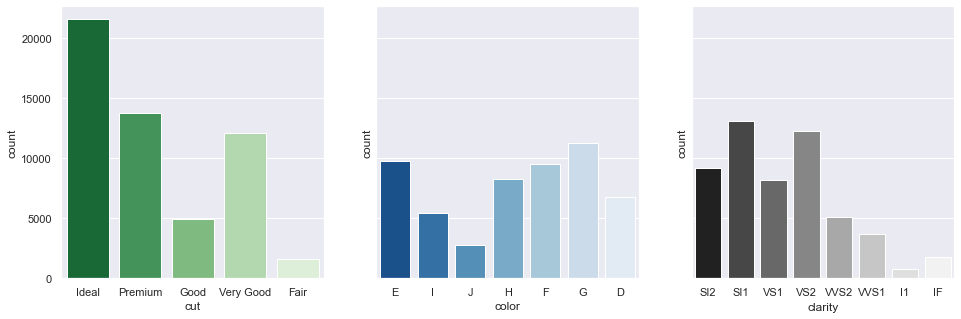

In [189]:
# count of cut, color and clarity

fig, axes = plt.subplots(1, 3, figsize=(16,5), sharey=True)

plt.subplot(1, 3, 1)
sb.countplot(data=diamond_focus, x="cut",palette='Greens_r')

plt.subplot(1, 3, 2)
sb.countplot(data=diamond_focus, x="color", palette='Blues_r')

plt.subplot(1, 3, 3)
sb.countplot(data=diamond_focus, x="clarity", palette='Greys_r')


- Cut: Quality of diamond cut - (low) Fair, Good, Very Good, Premium, Ideal (best)
- Color: Measure of diamond coloration - (some color) J, I, H, G, F, E, D (colorless).
- Clarity: Measure of diamond inclusions - (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless)

#### Observation
The cut quality of the diamonds in the dataset is generally quite good, with most of them in the Premium or Ideal level. Most of the diamonds are also of color quality G or better. Clarity, shows a trend opposite from the other two features, with most of the diamonds on the lower end of the scale, at VS2 or worse. Clarity grades become rarer as steps are taken up the scale.

A standard convention to take is to sort the bars from longest to shortest: while it is always possible to compare the bar lengths no matter the order, this can reduce the burden on the reader to make those comparisons themselves. The major exception to this is if the category labels are inherently ordered in some way. In cases like that, the inherent ordering usually takes precedence.

#### Piechart

In [194]:
# value count of diamond cuts

piechart_val = diamond_focus.cut.value_counts()
piechart_val

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

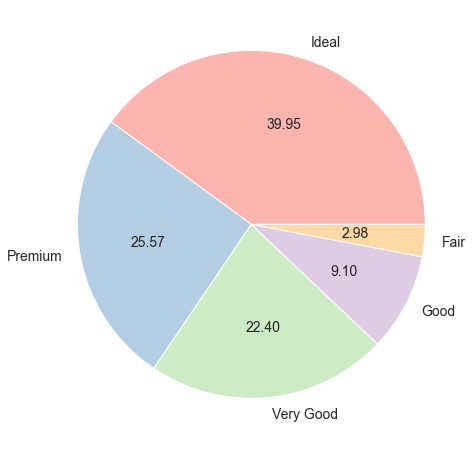

In [230]:
# piechart plot of diamond cut

plt.figure(figsize=[8,8])
colors = sb.set_theme(palette='Pastel1')

plt.pie(piechart_val, labels=piechart_val.index, autopct='%.2f', textprops={'fontsize': 14}, colors=colors);

# Bivariate Exploration

What can we check under Bivariate Exploration 

#### Question
- Relationships between variables

- Scatter Plots/Area charts - check relationship and the strenght of the relationship (correlation) - also use reg plot
- Grouped Bar charts/Stacked - relationship between two categorical variable
- Heat map - alternatively use heat map
- Violin plot - relationship between Numerical and categorical
- Box plot - relationship between Numerical and categorical
- Plot matrix

In [288]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Plot Matrix

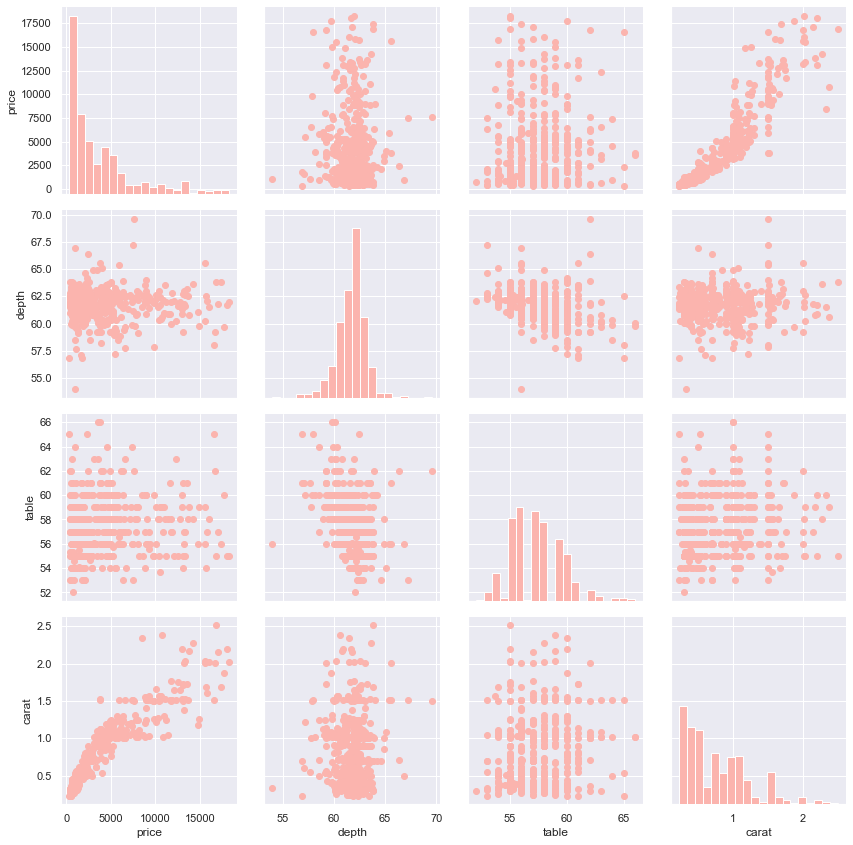

In [301]:
#Plot Matrix from diamond_df

select_numeric_var = diamond_df[['price','depth','table','carat']]
samples = np.random.choice(diamond_df.shape[0], 500, replace = False)
diamonds_samp = diamond_df.loc[samples,:]

g = sb.PairGrid(data = diamonds_samp, vars = select_numeric_var, height=3)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

In [217]:
diamond_focus.head()

,price,carat,cut,color,clarity
0,326,0.23,Ideal,E,SI2
1,326,0.21,Premium,E,SI1
2,327,0.23,Good,E,VS1
3,334,0.29,Premium,I,VS2
4,335,0.31,Good,J,SI2


### We compare the average prices of the different types of diamond cuts using seaborn barplot

- price of cut
- price of color
- price of clarity


sb.barplot(data=diamond_focus, x='cut', y='price', palette='Greens_r')

<AxesSubplot:xlabel='clarity', ylabel='price'>

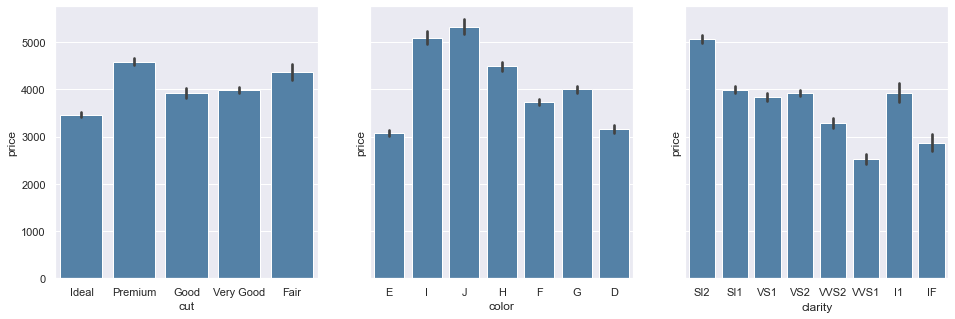

In [209]:
# average price of diamonds by cut, color and calirty

clrs='#4682B4'

fig, axes = plt.subplots(1, 3, figsize=(16,5), sharey=True)

plt.subplot(1, 3, 1)
sb.barplot(data=diamond_focus, x='cut', y='price', color=clrs)

plt.subplot(1, 3, 2)
sb.barplot(data=diamond_focus, x='color', y='price', color=clrs)

plt.subplot(1, 3, 3)
sb.barplot(data=diamond_focus, x='clarity', y='price', color=clrs)


<AxesSubplot:xlabel='clarity', ylabel='carat'>

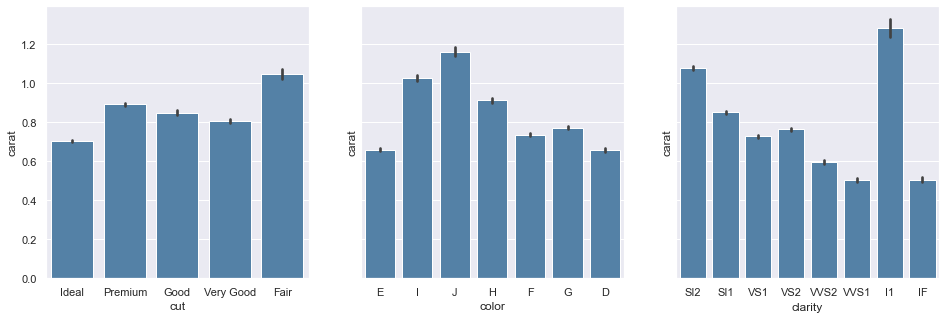

In [210]:
# average carat of diamonds by cut, color and calirty

clrs='#4682B4'

fig, axes = plt.subplots(1, 3, figsize=(16,5), sharey=True)

plt.subplot(1, 3, 1)
sb.barplot(data=diamond_focus, x='cut', y='carat', color=clrs)

plt.subplot(1, 3, 2)
sb.barplot(data=diamond_focus, x='color', y='carat', color=clrs)

plt.subplot(1, 3, 3)
sb.barplot(data=diamond_focus, x='clarity', y='carat', color=clrs)


#### Relationships between: Price and Carat

- Scatter plots

In [211]:
diamond_focus.head()

,price,carat,cut,color,clarity
0,326,0.23,Ideal,E,SI2
1,326,0.21,Premium,E,SI1
2,327,0.23,Good,E,VS1
3,334,0.29,Premium,I,VS2
4,335,0.31,Good,J,SI2


<AxesSubplot:xlabel='carat', ylabel='price'>

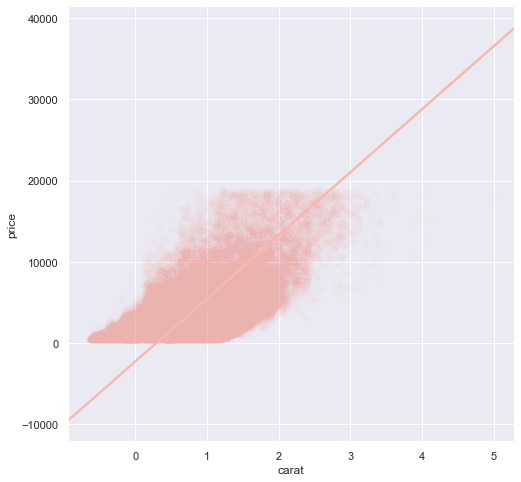

In [243]:
# scatter plot of carat vs price - jitters, alpha with regression line using seaborn regplot

plt.figure(figsize=[8,8])

sb.regplot(data = diamond_focus, x='carat', y='price', truncate=False, x_jitter=0.9, scatter_kws={'alpha':1/40})

In [244]:
# describe dataset to see range of values for carat

diamond_focus.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

#### Log Transformation

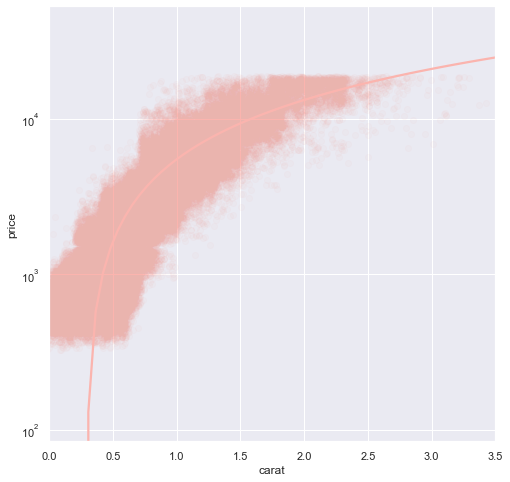

In [252]:
plt.figure(figsize=[8,8])

# with log transform

sb.regplot(data = diamond_focus, x='carat', y='price', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20})
plt.xlim([0, 3.5])
plt.yscale('log')


A regression model will have unit changes between the x and y variables, where a single unit change in x will coincide with a constant change in y. **Taking the log of one or both variables will effectively change the case from a unit change to a percent change.** This is especially important when using medium to large datasets. Another way to think about it is when taking a log of a dataset is transforming your model(s) to take advantage of statistical tools such as linear regression that improve on features that are normally distributed.

Logarithmic transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset. When modeling variables with non-linear relationships, the chances of producing errors may also be skewed negatively. 

In theory, we want to produce the smallest error possible when making a prediction, while also taking into account that we should not be overfitting the model. 

Overfitting occurs when there are too many dependent variables in play that it does not have enough generalization of the dataset to make a valid prediction. Using the logarithm of one or more variables improves the fit of the model by transforming the distribution of the features to a more normally-shaped bell curve.

[Logarithmic Transformation in Linear Regression Models: Why & When](https://dev.to/rokaandy/logarithmic-transformation-in-linear-regression-models-why-when-3a7c#:~:text=The%20Why%3A,may%20also%20be%20skewed%20negatively.)

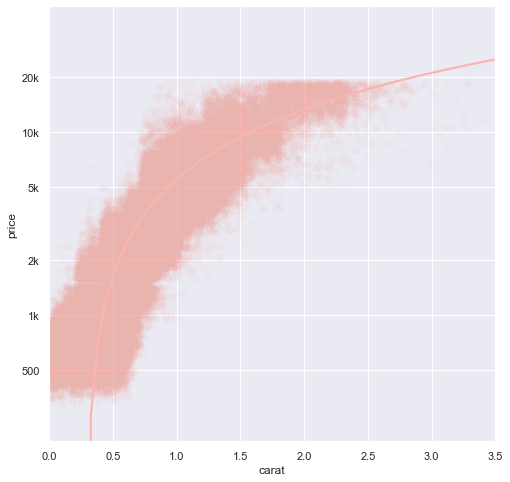

In [253]:
plt.figure(figsize=[8,8])

# with log transform with yticks lables


sb.regplot(data = diamond_focus, x='carat', y='price', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20})
plt.xlim([0, 3.5])
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k']);

#### Observation

This plot suggests from the concavity that we might want to also transform the 'carat' variable to see a linear trend. There also appears to be a price ceiling in the data: given the spread of prices for carat values less than 1.5, we'd expect the prices to be more spread out for carat sizes greater than 1.5 and to see diamonds of value higher than $20k.

In [316]:
diamond_focus.head()

,price,carat,cut,color,clarity
0,326,0.23,Ideal,E,SI2
1,326,0.21,Premium,E,SI1
2,327,0.23,Good,E,VS1
3,334,0.29,Premium,I,VS2
4,335,0.31,Good,J,SI2


#### Violin Plot

<AxesSubplot:xlabel='clarity', ylabel='price'>

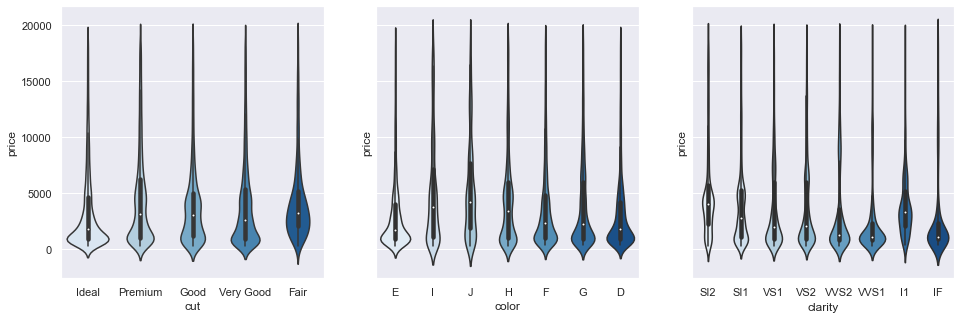

In [334]:
# Violin plot - price (numeric), cut, color, clarity

colors = sb.set_theme(palette='Greens')

fig, axes = plt.subplots(1, 3, figsize=(16,5), sharey=True)

plt.subplot(1, 3, 1)
sb.violinplot(data=diamond_focus, x='cut', y='price', palette='Blues')

plt.subplot(1, 3, 2)
sb.violinplot(data=diamond_focus, x='color', y='price', palette='Blues')

plt.subplot(1, 3, 3)
sb.violinplot(data=diamond_focus, x='clarity', y='price', palette='Blues')


#### Observations
A lot of outliers across the prices of each of cut, color and clarity calls for further exploration and analysis

<AxesSubplot:xlabel='clarity', ylabel='price'>

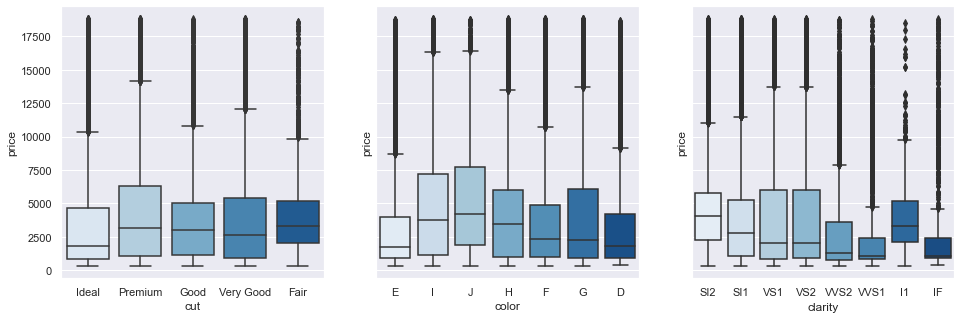

In [335]:
# Box plot -  price (numeric), cut, color, clarity

fig, axes = plt.subplots(1, 3, figsize=(16,5), sharey=True)

plt.subplot(1, 3, 1)
sb.boxplot(data=diamond_focus, x='cut', y='price', palette='Blues')

plt.subplot(1, 3, 2)
sb.boxplot(data=diamond_focus, x='color', y='price', palette='Blues')

plt.subplot(1, 3, 3)
sb.boxplot(data=diamond_focus, x='clarity', y='price', palette='Blues')


#### Observations

A lot of outliers across the prices of each of cut, color and clarity, calls for further exploration and analysis

The diamonds with the best features (Ideal cut, color D & E, clarity IF) seem to get the lowest prices, but also tend to be smaller on average.

<AxesSubplot:xlabel='clarity', ylabel='carat'>

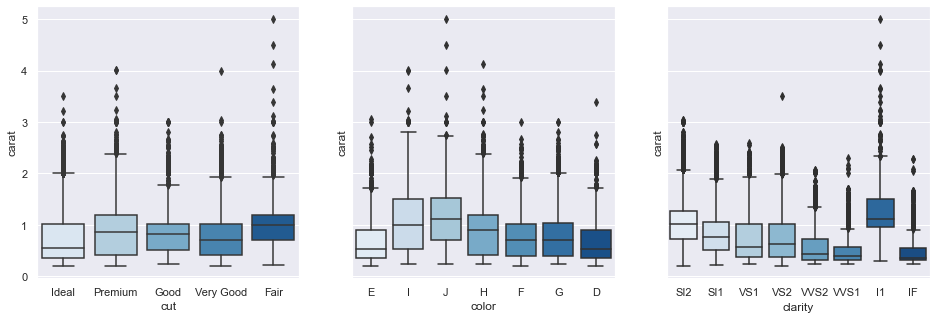

In [336]:
# Box plot -  carat (numeric), cut, color, clarity

fig, axes = plt.subplots(1, 3, figsize=(16,5), sharey=True)

plt.subplot(1, 3, 1)
sb.boxplot(data=diamond_focus, x='cut', y='carat', palette='Blues')

plt.subplot(1, 3, 2)
sb.boxplot(data=diamond_focus, x='color', y='carat', palette='Blues')

plt.subplot(1, 3, 3)
sb.boxplot(data=diamond_focus, x='clarity', y='carat', palette='Blues')


#### Observations

The diamonds with the best features (Ideal cut, color E & D, clarity IF) seem to have the lowest carat

#### Revision -  Creating Categorial Variables from qualitative variable

In [61]:
diamond_focus.head()

,price,carat,cut,color,clarity
0,326,0.23,Ideal,E,SI2
1,326,0.21,Premium,E,SI1
2,327,0.23,Good,E,VS1
3,334,0.29,Premium,I,VS2
4,335,0.31,Good,J,SI2


In [269]:
diamond_focus.cut.value_counts().index.tolist()

['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [270]:
# Types of cut
cut_classes = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

# Returns the types for cut_classes with the categories and orderedness
cclasses = pd.api.types.CategoricalDtype(ordered=True, categories=cut_classes) # create ordered categorical type 

# Use pandas.astype() to convert the "cut" column from a plain object type into an ordered categorical type 
diamond_focus.cut = diamond_focus['cut'].astype(cclasses);

C:\Users\Dipson\AppData\Local\Temp\ipykernel_6684\3793773453.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamond_focus.cut = diamond_focus['cut'].astype(cclasses);


[String to Category Reference](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html)

In [271]:
diamond_focus.cut.dtypes

CategoricalDtype(categories=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], ordered=True)

# Multivariate Exploration

#### Question

Multiple charts, faceting - adding a dimension for comparison and relationship

- Heat map - correlation of numerical values
- Grouped Bar charts/Stacked - relationship between several categorical variable
- Box plot with hue to add dimensions using 'row' and 'col'
- Faceting - multiple chart grids - using third variable - hue, row, cols
- Plot matrixs - using PairGrid

#### Faceted scatter plot:
- price, carat, color
- price, carat, cut
- price, carat, clarity

In [272]:
diamond_focus.head()

,price,carat,cut,color,clarity
0,326,0.23,Ideal,E,SI2
1,326,0.21,Premium,E,SI1
2,327,0.23,Good,E,VS1
3,334,0.29,Premium,I,VS2
4,335,0.31,Good,J,SI2


In [273]:
diamond_focus.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

#### Visaulize

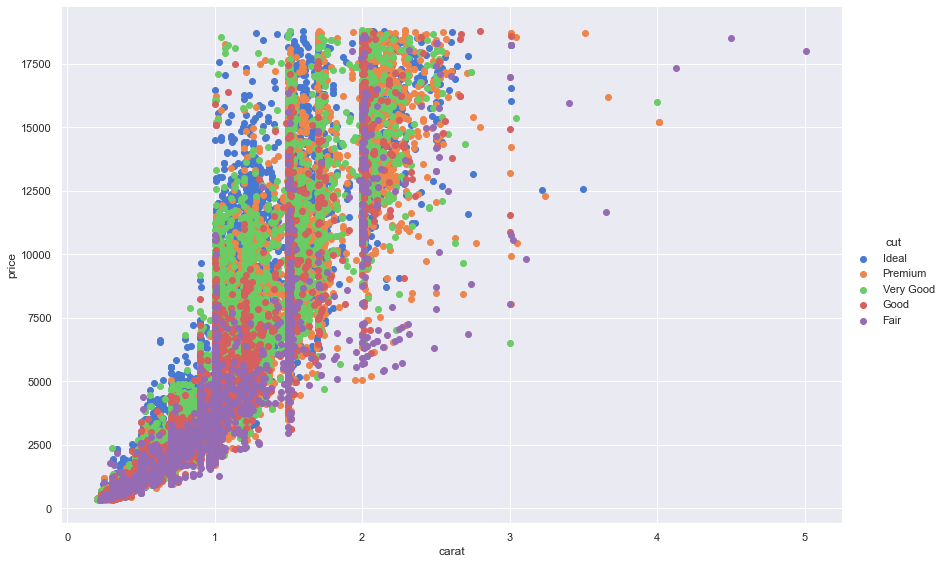

In [275]:
# price, carat, cut

g = sb.FacetGrid(data = diamond_focus, hue = 'cut', height=8, aspect=1.5)
g.map(plt.scatter, 'carat', 'price')
g.add_legend()

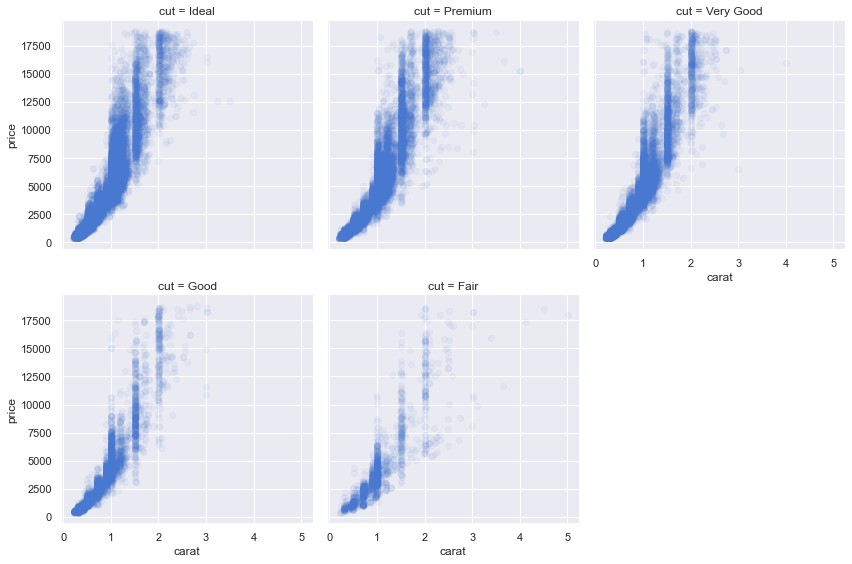

In [105]:
# price, carat by cut

g = sb.FacetGrid(data = diamond_focus, col = 'cut', height=4, col_wrap = 3)
g.map(plt.scatter, 'carat', 'price', alpha=1/20)

- cut: Quality of diamond cut -  (low) Fair, Good, Very Good, Premium, Ideal (best)


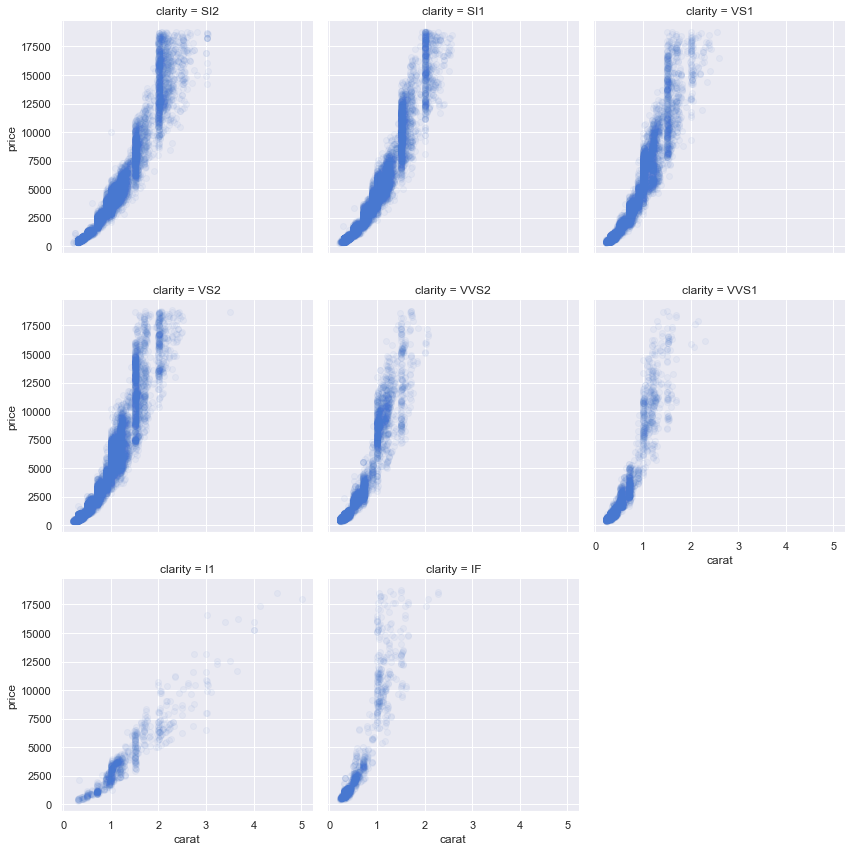

In [106]:

# price, carat by clarity

g = sb.FacetGrid(data = diamond_focus, col = 'clarity', height=4, col_wrap = 3)
g.map(plt.scatter, 'carat', 'price', alpha=1/20)

- clarity: Measure of diamond inclusions - (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless)

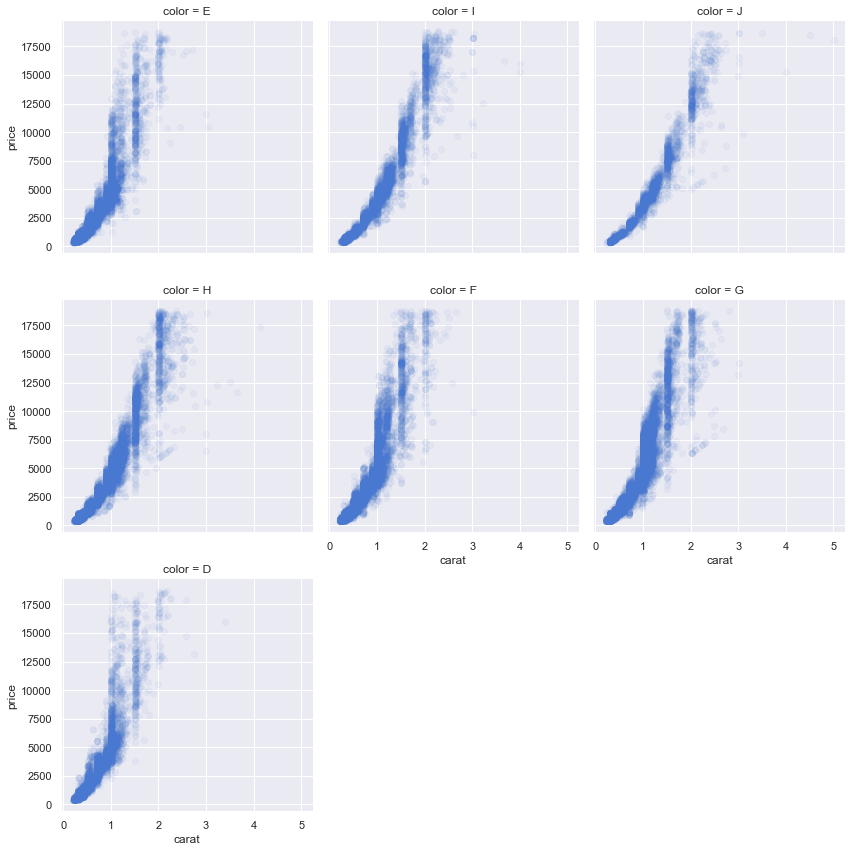

In [107]:
# price, carat by color

g = sb.FacetGrid(data = diamond_focus, col = 'color', height=4, col_wrap = 3)
g.map(plt.scatter, 'carat', 'price', alpha=1/20)

#### Heatmap

<AxesSubplot:>

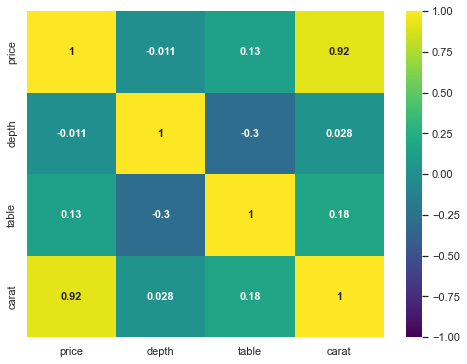

In [302]:
# correlation with heat map from the diamond_df - multiple numerical  variables correlation

plt.figure(figsize=[8,6])

corr = select_numeric_var.corr()
sb.heatmap(corr, cmap='viridis', vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':11, 'fontweight':'bold'})


- color: Measure of diamond coloration -  (some color) J, I, H, G, F, E, D (colorless).

In [220]:
diamond_focus.head()

,price,carat,cut,color,clarity
0,326,0.23,Ideal,E,SI2
1,326,0.21,Premium,E,SI1
2,327,0.23,Good,E,VS1
3,334,0.29,Premium,I,VS2
4,335,0.31,Good,J,SI2


#### Joint Plot

A joint plot comprises three charts in one. The center contains the bivariate relationship between the x and y variables. The top and right-side plots show the univariate distribution of the x-axis and y-axis variables, respectively.

In [231]:
diamond_focus_ipg = diamond_focus[diamond_focus.cut.isin(['Ideal', 'Premium','Good'])]
diamond_focus_ipg.head()

,price,carat,cut,color,clarity
0,326,0.23,Ideal,E,SI2
1,326,0.21,Premium,E,SI1
2,327,0.23,Good,E,VS1
3,334,0.29,Premium,I,VS2
4,335,0.31,Good,J,SI2


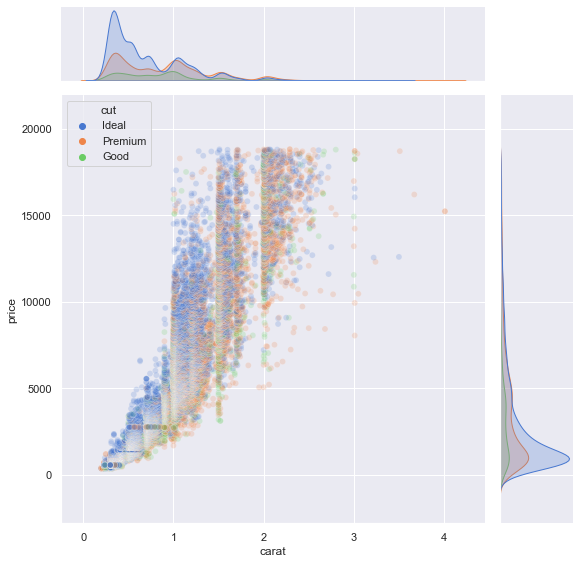

In [256]:
# joint plot of two numeric and one categorial variable

sb.jointplot(x='carat', y='price', data=diamond_focus_ipg, hue='cut', alpha=1/5, height=8);

We observe a general price ceiling around 1800 from the scatter plot, strong positive correlation between price and carat and for each of the diamond cut types. The prices for the various cut types are similar with the exception of some premium showing a few more higher carats

The carat of ideal cut diamonds is skewed to the right, carats are generally lower across the the three cut types

The price of ideal, premium and good cut diamonds is skewed to the left, price of the various three cut types are generally lower

<AxesSubplot:xlabel='color', ylabel='price'>

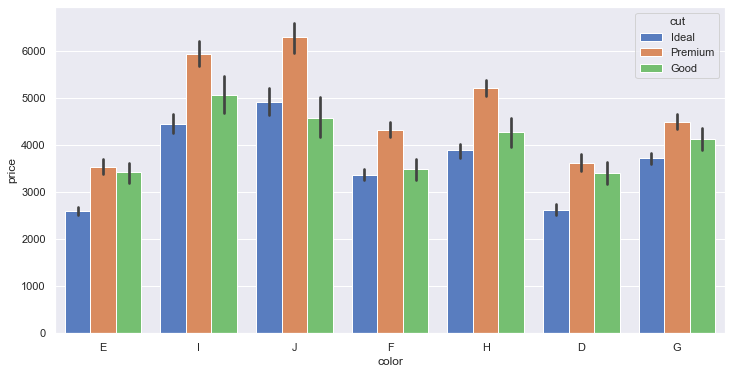

In [253]:
plt.figure(figsize=[12, 6])
sb.barplot(x='color', y='price', data=diamond_focus_ipg, hue='cut')

* The price of diamonds with color J and I across the 3 types of diamond cuts appears to be generally higher than the price of other colors

* The premium diamond cut with color J has the highest price

* Ideal cut Diamonds with color D and E have the lowest prices

# Explanatory Visualization

Focus on summary or conclusion data and focus on key charts

Adjust charts (xticks, ytickx as necessary)

Appropriate labels and titles
- Does the plot has an informative title?
- Are the axis labels informative?
- Are the tick values interpretable?
- Do we need to worry about any of the plot aesthetics?

Arrange charts visually to communicate the story properly


[example2](C:/Users/Dipson/Downloads/communicate-data-example-project/Example%20Project/Example_Project_Diamonds_Part2.slides.html)

# A Peek at Project 3 - Communicate Data Findings

![project3](https://big2smart.com/wp-content/uploads/2019/11/Data-Interpretation-.png)